## 📥 Importing Libraries
Essential libraries for data manipulation, modeling, and evaluation are imported in this cell.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Basic Libraries
import os  # Interact with the operating system (e.g., file paths, directories)
from pathlib import Path  # Easier and more readable file path handling

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import *
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Data Handling
import numpy as np  # Useful for numerical operations and handling arrays
import pandas as pd  # For working with data tables (e.g., reading CSV files, dataframes)

# Data Visualization
import matplotlib.pyplot as plt  # Create basic plots like line, bar, scatter
import seaborn as sns  # Build attractive and informative statistical plots

# Machine Learning Tools
from sklearn.model_selection import KFold  # Split data into folds for cross-validation
from sklearn.metrics import mean_squared_error  # Measure prediction error

# Machine Learning Model
import lightgbm as lgb  # A fast and powerful gradient boosting framework

# Additional Utilities
import statistics  # Perform basic statistical calculations (mean, median, etc.)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/dsn-free-ai-classes-in-every-city-2025/SampleSubmission.csv
/kaggle/input/dsn-free-ai-classes-in-every-city-2025/train.csv
/kaggle/input/dsn-free-ai-classes-in-every-city-2025/test.csv


## 📊 Data Loading
Load training and test datasets provided by the competition.

In [2]:
train_df = pd.read_csv('/kaggle/input/dsn-free-ai-classes-in-every-city-2025/train.csv')
test_df = pd.read_csv('/kaggle/input/dsn-free-ai-classes-in-every-city-2025/test.csv')

In [3]:
train_df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
test_df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


## 🧹 Handle Missing Values and Encode Categorical Features

This section performs two key preprocessing steps:

1. **Missing Value Imputation:**  
   Missing values in the `Store_Size` column are filled with `'Medium'`, assuming it is the most frequent or neutral category.

2. **Manual Label Encoding:**  
   - `Store_Size` is mapped to ordinal values: `Small → 0`, `Medium → 1`, `High → 2`.  
   - `Item_Sugar_Content` is mapped to numerical levels based on intensity:  
     `Ultra Low Sugar → 0`, `Low Sugar → 1`, `Normal Sugar → 2`.

These encodings prepare the categorical variables for numerical modeling without introducing unintended ordinal bias beyond the intended domain logic.

In [5]:
# Step 1: Fill NaN with 'Medium'
train_df['Store_Size'] = train_df['Store_Size'].fillna('Medium')
test_df['Store_Size'] = test_df['Store_Size'].fillna('Medium')

# Step 2: Manual label encoding
store_size_map = {
    'Small': 0,
    'Medium': 1,
    'High': 2
}
item_sugar_content_map = {
    'Ultra Low Sugar': 0,
    'Low Sugar': 1,
     'Normal Sugar': 2
}

train_df['Store_Size'] = train_df['Store_Size'].map(store_size_map)
test_df['Store_Size'] = test_df['Store_Size'].map(store_size_map)
train_df['Item_Sugar_Content'] = train_df['Item_Sugar_Content'].map(item_sugar_content_map)
test_df['Item_Sugar_Content'] = test_df['Item_Sugar_Content'].map(item_sugar_content_map)

In [6]:
print(f"Different Classes in Item Sugar Content are {train_df['Item_Sugar_Content'].unique()}")

Different Classes in Item Sugar Content are [1 0 2]


## 🏪 One-Hot Encoding of Categorical Features

This section performs **one-hot encoding** on two categorical variables:

- `Store_Location_Type` (e.g., Cluster 1, Cluster 2, Cluster 3)
- `Store_Type` (e.g., Grocery Store, Supermarket, etc.)

Using `pd.get_dummies()`, each category is transformed into its own binary column. This allows machine learning models to interpret these features numerically without assuming any ordinal relationship between categories.

In [7]:
train_store_location_type = pd.get_dummies(train_df['Store_Location_Type'])
test_store_location_type = pd.get_dummies(test_df['Store_Location_Type'])
train_store_type = pd.get_dummies(train_df['Store_Type'])
test_store_type = pd.get_dummies(test_df['Store_Type'])

In [8]:
train_store_location_type.head()

,Cluster 1,Cluster 2,Cluster 3
0,False,False,True
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False


In [9]:
test_store_location_type.head()

,Cluster 1,Cluster 2,Cluster 3
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [10]:
train_df = pd.concat([train_df, train_store_location_type], axis=1)
train_df = pd.concat([train_df, train_store_type], axis=1)
test_df = pd.concat([test_df, test_store_location_type], axis=1)
test_df = pd.concat([test_df, test_store_type], axis=1)

In [11]:
train_df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,1,0.068535,Soft Drinks,357.54,2005,1,Cluster 3,Grocery Store,709.08,False,False,True,True,False,False,False
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,1,0.040912,Soft Drinks,355.79,1994,2,Cluster 3,Supermarket Type1,6381.69,False,False,True,False,True,False,False
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,1,0.041178,Soft Drinks,350.79,2014,1,Cluster 2,Supermarket Type1,6381.69,False,True,False,False,True,False,False
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,1,0.041113,Soft Drinks,355.04,2016,1,Cluster 3,Supermarket Type2,2127.23,False,False,True,False,False,True,False
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,0,0.000000,Soft Drinks,354.79,2011,0,Cluster 2,Supermarket Type1,2481.77,False,True,False,False,True,False,False


In [12]:
train_df.describe()

,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Price,Store_Start_Year,Store_Size,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,1.319639,0.066916,391.803796,2004.783567,0.845691,6103.520164
std,4.703256,0.537467,0.053058,119.378259,8.283151,0.607163,4447.333835
min,4.555000,0.000000,0.000000,78.730000,1992.000000,0.000000,83.230000
25%,8.767500,1.000000,0.027273,307.890000,1994.000000,0.000000,2757.660000
50%,12.600000,1.000000,0.053564,393.860000,2006.000000,1.000000,5374.675000
75%,17.100000,2.000000,0.095358,465.067500,2011.000000,1.000000,8522.240000
max,21.350000,2.000000,0.328391,667.220000,2016.000000,2.000000,32717.410000


In [13]:
train_features = train_df.copy()
test_features = test_df.copy()

## 📊 Feature Relationship Visualization

This section uses **Seaborn scatter plots** to visualize the relationship between each feature and the target variable `Item_Store_Returns`.

- Iterates through each feature (excluding the target).
- Plots a scatter plot for each, helping to identify:
  - Linear or non-linear trends,
  - Potential outliers,
  - Feature importance visually,
  - Noise or irrelevance in features.

This is a crucial step in exploratory data analysis (EDA) to guide further preprocessing or feature engineering.

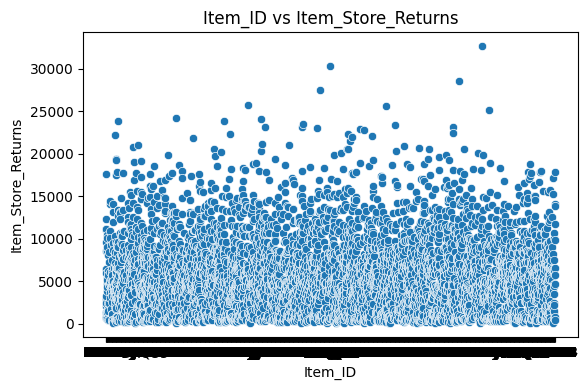

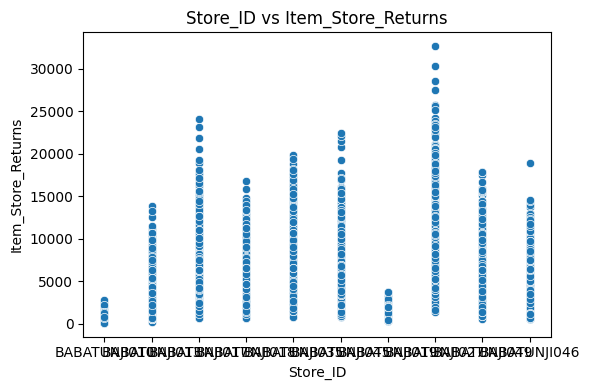

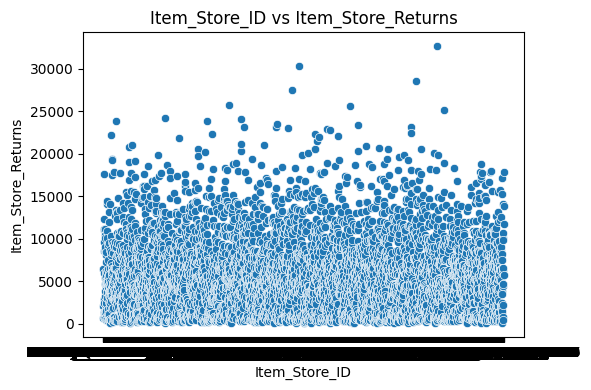

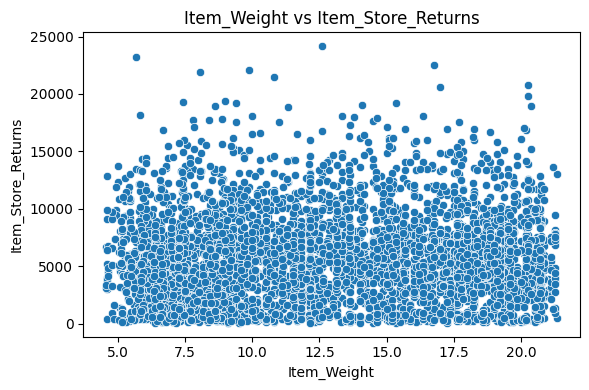

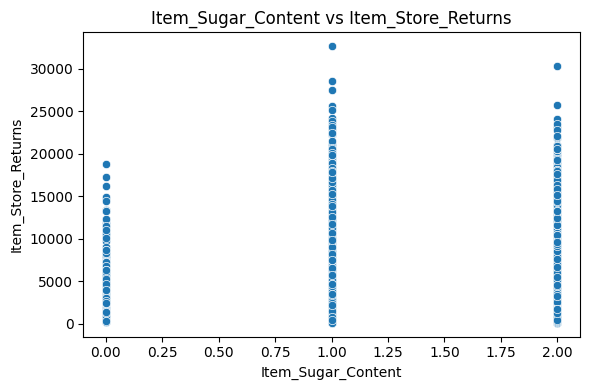

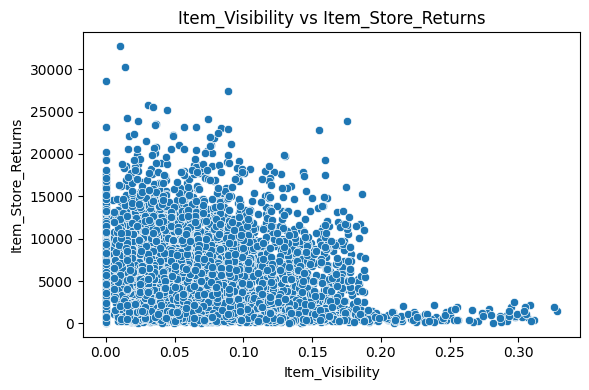

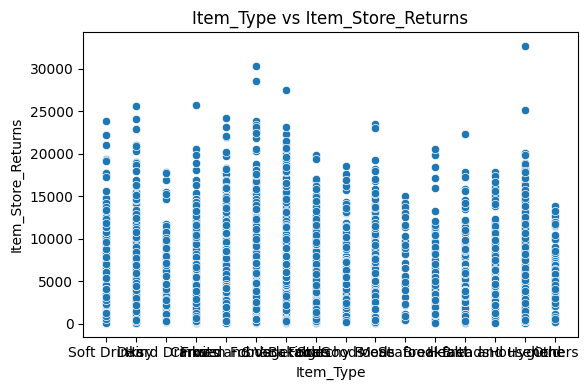

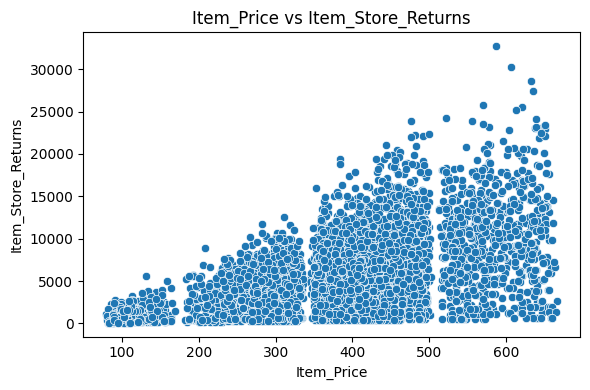

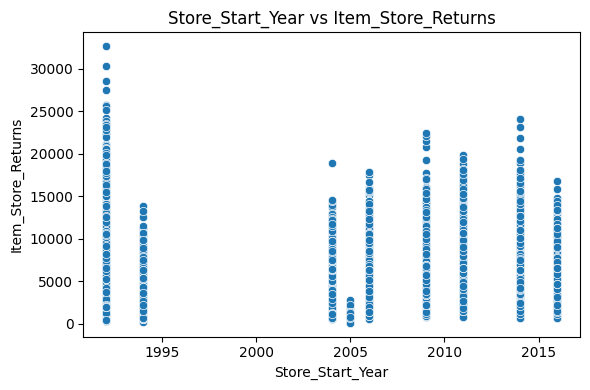

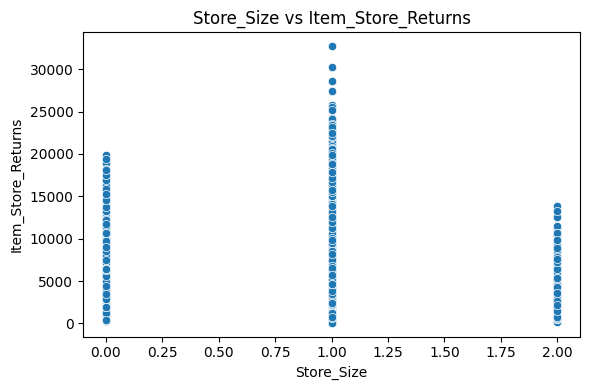

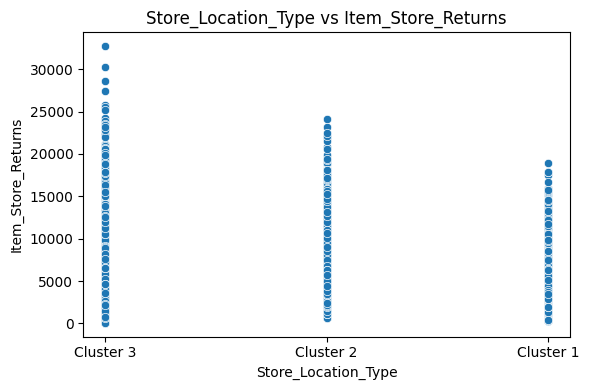

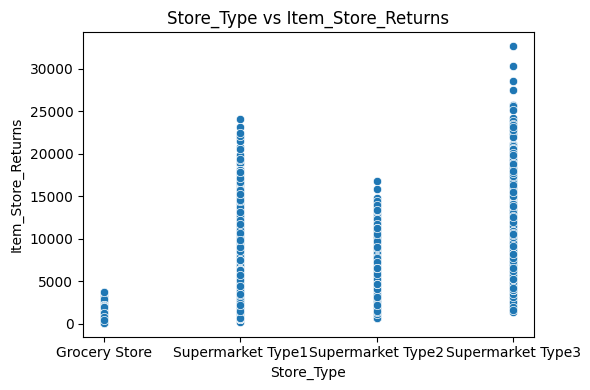

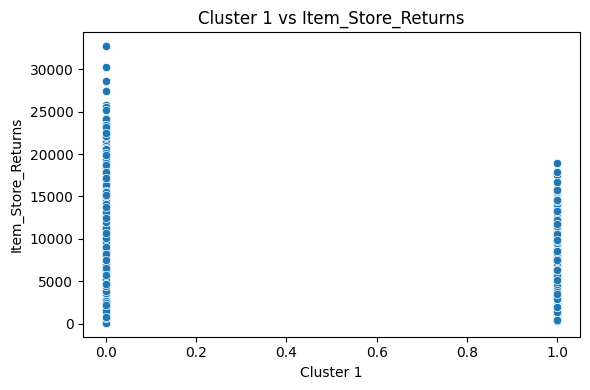

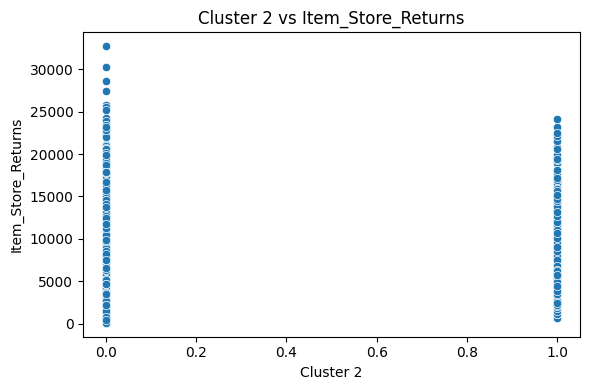

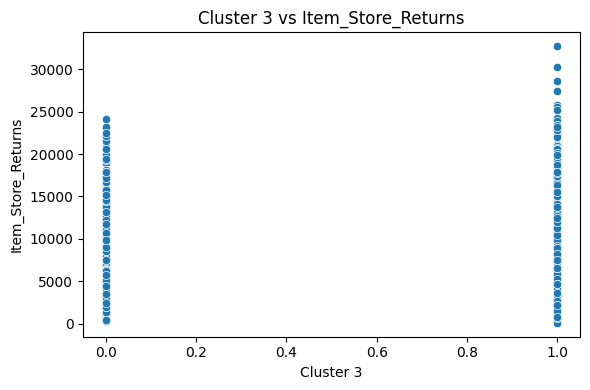

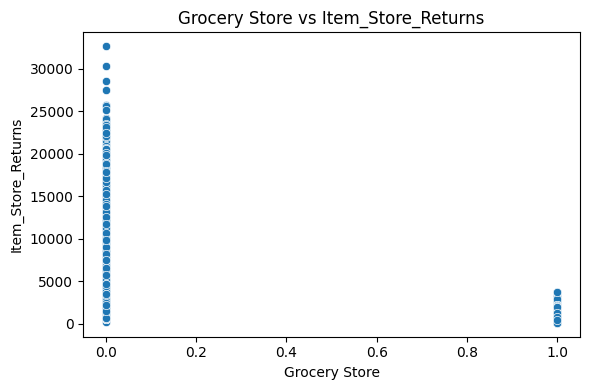

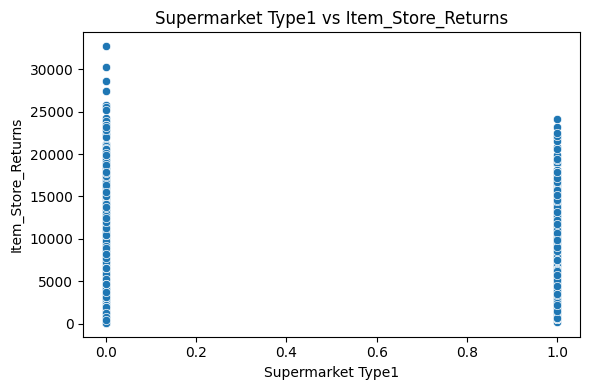

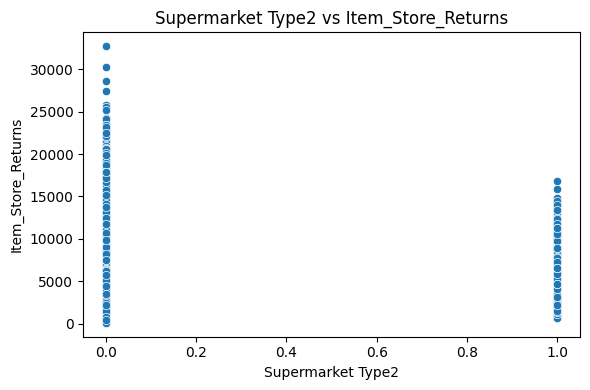

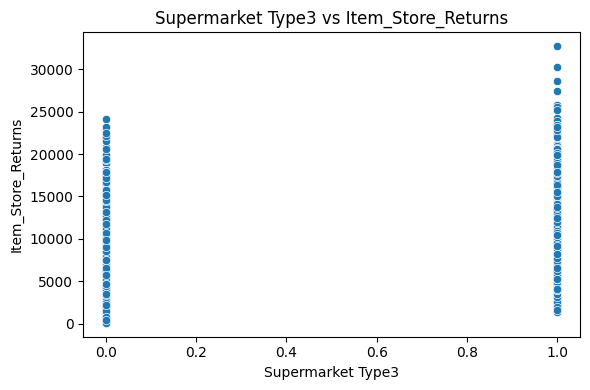

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in train_features.drop(columns=['Item_Store_Returns']).columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=train_features[col], y=train_features['Item_Store_Returns'])
    plt.title(f'{col} vs Item_Store_Returns')
    plt.xlabel(col)
    plt.ylabel('Item_Store_Returns')
    plt.tight_layout()
    plt.show()

## 📈 Correlation Analysis

This line computes the **Pearson correlation coefficients** between all numeric features and the target variable `Item_Store_Returns`.

- `numeric_only=True` ensures only numeric columns are considered.
- Results are sorted in descending order to quickly identify:
  - Features with strong positive correlation,
  - Features with negative or negligible correlation.

This helps in understanding which variables are most linearly associated with the target and may inform feature selection or dimensionality reduction.

In [15]:
train_features.corr(numeric_only=True)['Item_Store_Returns'].sort_values(ascending=False)

Item_Store_Returns    1.000000
Item_Price            0.518285
Supermarket Type3     0.463860
Cluster 2             0.227310
Supermarket Type1     0.106566
Store_Start_Year      0.051297
Item_Sugar_Content    0.030969
Item_Weight           0.015322
Store_Size           -0.018917
Supermarket Type2    -0.042241
Cluster 3            -0.057204
Item_Visibility      -0.164943
Cluster 1            -0.170851
Grocery Store        -0.488855
Name: Item_Store_Returns, dtype: float64

In [16]:
# Aggregate Item_Price stats by Store_Type including quantiles and range
store_price_stats = train_features.groupby('Store_Type')['Item_Price'].agg(
    mean_price='mean',
    std_price='std',
    max_price='max',
    min_price='min',
    sum_price='sum',
    median_price='median',
    skew_price='skew',
    q25_price=lambda x: x.quantile(0.25),
    q75_price=lambda x: x.quantile(0.75),
).reset_index()

# Calculate range and IQR (interquartile range)
store_price_stats['range_price'] = store_price_stats['max_price'] - store_price_stats['min_price']
store_price_stats['iqr_price'] = store_price_stats['q75_price'] - store_price_stats['q25_price']

# Merge back into train and test features
train_features = train_features.merge(store_price_stats, on='Store_Type', how='left')
test_features = test_features.merge(store_price_stats, on='Store_Type', how='left')

In [17]:
train_features.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,...,std_price,max_price,min_price,sum_price,median_price,skew_price,q25_price,q75_price,range_price,iqr_price
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,1,0.068535,Soft Drinks,357.54,2005,1,...,135.118812,665.06,81.64,253734.60,362.325,0.020657,270.2125,432.850,583.42,162.6375
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,1,0.040912,Soft Drinks,355.79,1994,2,...,119.509082,667.22,78.73,1288909.58,390.120,-0.032841,305.5200,463.440,588.49,157.9200
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,1,0.041178,Soft Drinks,350.79,2014,1,...,119.509082,667.22,78.73,1288909.58,390.120,-0.032841,305.5200,463.440,588.49,157.9200
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,1,0.041113,Soft Drinks,355.04,2016,1,...,78.235234,536.05,257.25,192849.77,388.165,0.006108,309.3250,449.915,278.80,140.5900
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,0,0.000000,Soft Drinks,354.79,2011,0,...,119.509082,667.22,78.73,1288909.58,390.120,-0.032841,305.5200,463.440,588.49,157.9200


<Axes: >

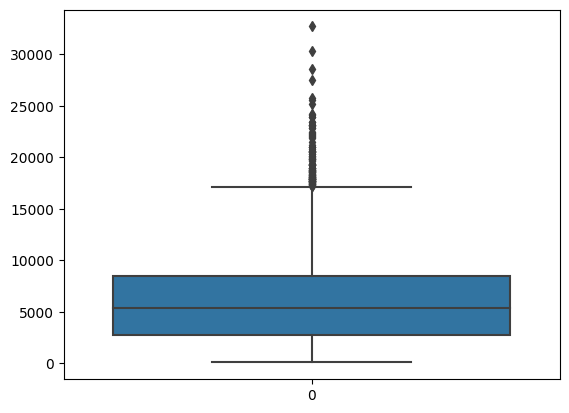

In [18]:
sns.boxplot(train_features['Item_Store_Returns'])

## 🏷️ Label Encoding and Feature Selection

This section prepares the data for modeling by encoding categorical variables and defining the input features.

### Steps:

1. **Identify Categorical Columns**:  
   Uses `select_dtypes` to find all columns of type `object`, which typically represent categorical data.

2. **Label Encoding**:  
   Applies `LabelEncoder` to each categorical column in both training and test sets.  
   Each unique category is mapped to an integer, and the encoders are stored for reproducibility.

3. **Feature Selection**:  
   Specifies a list of selected features based on domain knowledge or prior analysis, including:
   - Price-related features
   - One-hot encoded store types
   - Aggregated statistics (mean, std, etc.)
   - Store identifier

These steps ensure that all features are numeric and suitable for regression models.


In [19]:
# Identify categorical columns (object or category dtype)
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_features[col] = le.fit_transform(train_features[col])
    test_features[col] = le.fit_transform(test_features[col])
    label_encoders[col] = le  
    
features = ['Item_Price', 'Supermarket Type1',
            'Supermarket Type2','Supermarket Type3', 
            'Grocery Store', 
            'mean_price','std_price',
            'max_price','min_price', 'Store_ID'
           ]

X = train_features[features]
y = train_features['Item_Store_Returns']

In [20]:
X

,Item_Price,Supermarket Type1,Supermarket Type2,Supermarket Type3,Grocery Store,mean_price,std_price,max_price,min_price,Store_ID
0,357.54,False,False,False,True,350.462155,135.118812,665.06,81.64,0
1,355.79,True,False,False,False,390.105805,119.509082,667.22,78.73,1
2,350.79,True,False,False,False,390.105805,119.509082,667.22,78.73,2
3,355.04,False,True,False,False,385.699540,78.235234,536.05,257.25,3
4,354.79,True,False,False,False,390.105805,119.509082,667.22,78.73,6
...,...,...,...,...,...,...,...,...,...,...
4985,402.39,False,False,False,True,350.462155,135.118812,665.06,81.64,4
4986,410.14,False,False,True,False,475.339805,83.062135,653.23,357.62,5
4987,406.14,True,False,False,False,390.105805,119.509082,667.22,78.73,7
4988,404.89,True,False,False,False,390.105805,119.509082,667.22,78.73,8


In [21]:
y

0         709.08
1        6381.69
2        6381.69
3        2127.23
4        2481.77
          ...   
4985      406.14
4986    13808.69
4987     5685.93
4988    11778.00
4989    17870.07
Name: Item_Store_Returns, Length: 4990, dtype: float64

## 🔄 Scaling and Polynomial Feature Transformation

This section prepares the selected features for model training by applying two key preprocessing steps:

1. **Min-Max Scaling**:  
   - Scales all features to the range [0, 1] using `MinMaxScaler`.
   - This normalization ensures that all features contribute equally to the model, especially important for regularized regressions like Lasso.

2. **Polynomial Feature Expansion**:  
   - Uses `PolynomialFeatures()` to generate higher-order interaction terms and squared features.
   - Helps models capture non-linear relationships in the data.

These transformations are applied to both training and test sets to maintain consistency during inference.


In [22]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
poly = PolynomialFeatures().fit(X_scaled)
X_scaled = poly.transform(X_scaled)

X_test = test_features[features]
X_test_scaled = scaler.transform(X_test)
X_test_scaled = poly.transform(X_test_scaled)

In [23]:
X_scaled

array([[1.00000000e+00, 4.73771857e-01, 0.00000000e+00, ...,
        1.08872976e-04, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.70798144e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.23456790e-02],
       [1.00000000e+00, 4.62301823e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.93827160e-02],
       ...,
       [1.00000000e+00, 5.56356098e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.04938272e-01],
       [1.00000000e+00, 5.54232018e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.90123457e-01],
       [1.00000000e+00, 5.51683121e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

## 🤖 Train and Evaluate Lasso Regression Model

This section trains a **Lasso Regression model** on the scaled feature set. Key points:

- **Lasso Regression** applies L1 regularization, which can shrink coefficients of less important features to zero — effectively performing feature selection.
- `alpha=5` controls the strength of regularization (higher = more regularization).
- Model is trained on the full dataset, and predictions are made on the same data.
- **Root Mean Squared Error (RMSE)** is computed to evaluate model performance on training data.

This step helps identify how well Lasso captures patterns in the data while controlling overfitting.

In [24]:
# Train Lasso model (you can tune alpha)
lasso = Lasso(alpha=5, max_iter=1000)  # default alpha=1.0
lasso.fit(X_scaled, y)

# Make predictions
y_pred = lasso.predict(X_scaled)

# Evaluate
mse = mean_squared_error(y, y_pred, squared=False)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 2906.34


## 🤖 Train and Evaluate Linear Regression Model

This section trains a **Linear Regression model** on the scaled feature set. Key points:

- Model is trained on the full dataset, and predictions are made on the same data.
- **Root Mean Squared Error (RMSE)** is computed to evaluate model performance on training data.

This step helps identify how well Linear captures patterns in the data while controlling overfitting.


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_scaled, y)

# Make predictions
y_pred = lr.predict(X_scaled)

# Evaluate
mse = mean_squared_error(y, y_pred, squared=False)

print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 2904.98


I trained other models but these two models (Lasso and Linear Regression) were my winning shots at the end of the day

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Train SVR model
svr = SVR(kernel='linear', C=1000, gamma=10)
svr.fit(X_scaled, y)

# Make predictions
y_pred = svr.predict(X_scaled)

# Evaluate
mse = mean_squared_error(y, y_pred, squared=False)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 2918.17


In [27]:
# Train Ridge model
ridge = Ridge(alpha=5, max_iter=1000, random_state=42)  # You can tune alpha
ridge.fit(X_scaled, y)

# Predict and evaluate
y_pred = ridge.predict(X_scaled)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f'Ridge RMSE: {rmse:.4f}')

Ridge RMSE: 2907.0371


In [28]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=5, l1_ratio=1)

enet.fit(X_scaled, y)

# Predict and evaluate
y_pred = enet.predict(X_scaled)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f'Ridge RMSE: {rmse:.4f}')

Ridge RMSE: 2906.3398


In [29]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor()

huber.fit(X_scaled, y)

# Predict and evaluate
y_pred = huber.predict(X_scaled)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f'Ridge RMSE: {rmse:.4f}')

Ridge RMSE: 2911.5877


In [30]:
from sklearn.linear_model import BayesianRidge
bridge = BayesianRidge()

bridge.fit(X_scaled, y)

# Predict and evaluate
y_pred = bridge.predict(X_scaled)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f'Ridge RMSE: {rmse:.4f}')

Ridge RMSE: 2905.2002


In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train XGBoost with linear booster
xgb_linear = XGBRegressor(
    booster='gblinear',
    n_estimators=1000,
    random_state=42,
    # reg_lambda=0.1,  # L2 regularization
    # reg_alpha=0.0    # L1 regularization
)
xgb_linear.fit(X_scaled, y)

# Predict and evaluate
y_pred = xgb_linear.predict(X_scaled)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f'XGBoost Linear Booster RMSE: {rmse:.2f}')

XGBoost Linear Booster RMSE: 2905.00


In [32]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Approximate the RBF kernel with 500 random features
rbf_feature = RBFSampler(gamma=1.0, n_components=1000, random_state=42)

# Use a linear model on the transformed features
model = make_pipeline(rbf_feature, Ridge(alpha=1.0))

model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

rmse = mean_squared_error(y, y_pred, squared=False)

print(f'XGBoost Linear Booster RMSE: {rmse:.2f}')

XGBoost Linear Booster RMSE: 2894.88


## 📤 Make Final Predictions and Generate Submission

This section performs prediction and prepares the final output for submission:

1. **Model Inference**:  
   - Generates predictions on the test set using both the retrained Lasso and Linear Regression models.

2. **Ensembling**:  
   - Averages predictions from the two models to improve robustness and reduce variance.

3. **Submission File Creation**:  
   - Constructs a `DataFrame` with the required submission format, containing:
     - `Item_Store_ID` from the test set,
     - The ensemble `Target` prediction.

This output is ready to be post-processed (e.g., clipped) and submitted to the Zindi platform.


In [33]:
test_predictions_lasso = lasso.predict(X_test_scaled)
test_predictions_lr = lr.predict(X_test_scaled)

test_predictions = (test_predictions_lr + test_predictions_lasso ) / 2

sub = pd.DataFrame({'Item_Store_ID': test_df['Item_Store_ID'], "Target": test_predictions})

In [34]:
sub

,Item_Store_ID,Target
0,DRA59_BABATUNJI010,1160.446994
1,DRA59_BABATUNJI013,7750.104515
2,DRB01_BABATUNJI013,7960.019247
3,DRB13_BABATUNJI010,1191.500956
4,DRB13_BABATUNJI013,7888.403311
...,...,...
3527,NCZ42_BABATUNJI010,1494.039849
3528,NCZ42_BABATUNJI013,9902.253025
3529,NCZ42_BABATUNJI049,9770.827198
3530,NCZ53_BABATUNJI010,1188.250775


In [35]:
sub.Target.max()

17247.960380810273

## 🧪 Pseudo-Labeling with Ensemble Agreement

This section implements a simple **pseudo-labeling strategy** using predictions from two base models: Lasso and Linear Regression.

### Steps:
1. **Averaging Predictions**:  
   Combines predictions from both models to produce a consensus estimate for each test sample.

2. **Measuring Agreement**:  
   Computes the absolute difference between model predictions. Low disagreement indicates high confidence in the pseudo-label.

3. **Thresholding**:  
   Uses a percentile threshold (e.g., median) to select high-confidence predictions where models agree the most.

4. **Creating Pseudo Labels**:  
   Constructs a new pseudo-labeled dataset (`pseudo_X`, `pseudo_y`) from the test set. These are treated as additional training samples in the next modeling step.

This technique is useful in semi-supervised learning when labeled data is limited.


In [36]:
# Average predictions from both models
test_predictions = (test_predictions_lr + test_predictions_lasso) / 2

# Optionally filter high-confidence predictions (e.g., where models agree)
agreement = np.abs(test_predictions_lr - test_predictions_lasso)
threshold = np.percentile(agreement, 50)  # Use lowest 25% disagreement

high_confidence_mask = agreement < threshold

# Create pseudo-labeled DataFrame
pseudo_X = X_test_scaled[high_confidence_mask]
pseudo_y = test_predictions[high_confidence_mask]

Stack `pseudo X` and `pseudo y` with `X_scaled`, `y_scaled`

In [37]:
X_pseudo_combined = np.vstack([X_scaled, pseudo_X])
y_pseudo_combined = np.concatenate([y, pseudo_y])

## 🔁 Retrain Models on Combined Data (Original + Pseudo-Labeled)

This section retrains the models using both:
- The original labeled training data, and
- The high-confidence pseudo-labeled test data.

### Models:
- `Lasso (lasso_pseudo)`: Benefits from L1 regularization and can ignore noisy pseudo-labels.
- `LinearRegression (lr_pseudo)`: A baseline model to compare the effect of pseudo-labeling.

By augmenting the training set with confident pseudo-labeled examples, the models can generalize better and potentially improve performance on unseen test data.


In [38]:
lasso_pseudo = Lasso(alpha=5, max_iter=1000)
lasso_pseudo.fit(X_pseudo_combined, y_pseudo_combined)

lr_pseudo = LinearRegression()
lr_pseudo.fit(X_pseudo_combined, y_pseudo_combined)

LinearRegression()

In [39]:
# Final test predictions after retraining
final_preds_lasso = lasso_pseudo.predict(X_test_scaled)
final_preds_lr = lr_pseudo.predict(X_test_scaled)

final_predictions = (final_preds_lasso + final_preds_lr) / 2

sub = pd.DataFrame({'Item_Store_ID': test_df['Item_Store_ID'], "Target": final_predictions})

In [40]:
sub.Target = (sub.Target * 0.975).round(2)

In [41]:
# Cap predictions at 14,000
sub["Target"] = sub["Target"].clip(upper=14000).round(2)

In [42]:
sub

,Item_Store_ID,Target
0,DRA59_BABATUNJI010,1141.28
1,DRA59_BABATUNJI013,7548.84
2,DRB01_BABATUNJI013,7753.63
3,DRB13_BABATUNJI010,1174.61
4,DRB13_BABATUNJI013,7683.47
...,...,...
3527,NCZ42_BABATUNJI010,1487.82
3528,NCZ42_BABATUNJI013,9645.95
3529,NCZ42_BABATUNJI049,9518.39
3530,NCZ53_BABATUNJI010,1172.43


In [43]:
sub.to_csv('submission107.csv', index=False)